In [1]:
# Librerias necesarias para el desarrollo del challenge:
import pandas as pd # libreria para el análisis de datos
import matplotlib.pyplot as plt # libreria para la visualización de los datos
import seaborn as sns # libreria para la visualización de los datos
import plotly.express as px # libreria para la visualización de los datos
from plotly.subplots import make_subplots # libreria para crear subplots
import numpy as np


# **Extracción de datos**

**Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.**

##### **Cargar los datos directamente desde la API utilizando Python.**
##### **Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.**

In [2]:
datos = pd.read_json('TelecomX_Data.json') # crear una variable para almacenar el df y leer la ruta delarhcivo
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#### **Explorar las columnas del dataset y verificar sus tipos de datos**

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### **En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.**

In [4]:
# revisión general
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### **Buscar valores nulos**

In [5]:
datos.isnull().sum() # la cantidad que devuelva será la cantidad de valores nulos
# se concluye que no hay valores nulos

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

#### **Buscar duplicados**

In [6]:
# datos.duplicated().sum() # la cantidad que devuelva será la cantidad de valores nulos

#### **Al haber datos agrupados en forma de diccionario, es necesario normalizarlos**

In [7]:
# aplicar la función para normalizar los datos en las columnas: costumer, phone, internet y account 

costumer_norm = pd.json_normalize(datos['customer'])
phone_norm = pd.json_normalize(datos['phone'])
internet_norm = pd.json_normalize(datos['internet'])
account_norm = pd.json_normalize(datos['account'])

In [8]:
print(costumer_norm, phone_norm, internet_norm, account_norm)

      gender  SeniorCitizen Partner Dependents  tenure
0     Female              0     Yes        Yes       9
1       Male              0      No         No       9
2       Male              0      No         No       4
3       Male              1     Yes         No      13
4     Female              1     Yes         No       3
...      ...            ...     ...        ...     ...
7262  Female              0      No         No      13
7263    Male              0     Yes         No      22
7264    Male              0      No         No       2
7265    Male              0     Yes        Yes      67
7266    Male              0     Yes        Yes      63

[7267 rows x 5 columns]      PhoneService     MultipleLines
0             Yes                No
1             Yes               Yes
2             Yes                No
3             Yes                No
4             Yes                No
...           ...               ...
7262          Yes                No
7263          Yes          

In [9]:
# una vez teniendo las columnas normalizadas, revisar por datos duplicados:

print(costumer_norm.duplicated().sum())
print(phone_norm.duplicated().sum())
print(internet_norm.duplicated().sum())
print(account_norm.duplicated().sum())

6376
7264
7138
336


#### **Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.**

In [10]:
# para lograr esto, no se puede simplemente eliminar los datos duplicados de columnas independientes, esto romperá la estructura de datos, asique:

# 1. normalizar las columnas del conjunto
costumer_norm = pd.json_normalize(datos['customer']).add_prefix('customer_')
phone_norm = pd.json_normalize(datos['phone']).add_prefix('phone_')
internet_norm = pd.json_normalize(datos['internet']).add_prefix('internet_')
account_norm = pd.json_normalize(datos['account']).add_prefix('account_')

# 2. usar un diccionario para crear un nuevo conjunto SIN datos duplicados
datos_limpios = pd.concat([ # usar la función concat para unir las columnas del dataframe con las nuevas columnas normalizadas
                datos[['customerID', 'Churn']],
                costumer_norm,
                phone_norm,
                internet_norm,
                account_norm
            ], axis=1)

# 3. eliminar los duplicados
datos_limpios = datos_limpios.drop_duplicates()

datos_limpios


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#### **Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.**

In [11]:
# crear una columna con las cuentas diarias, estas se calculan dividiendo las cuentas mensuales por la cantidad de dias por mes (aprox 30 dias)
datos_limpios['Cuentas_Diarias'] = datos_limpios['account_Charges.Monthly'] / 30
datos_limpios['Cuentas_Diarias'].describe() # visión detallada del comportamiento de los clientes

count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64

#### **Estandarización y transformación de datos (opcional)**

##### **La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.**

##### **Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.**

In [12]:
# renombrar la columna Cuentas_Diarias al inglés para mantener una correlación con el resto de las columnas
datos_limpios = datos_limpios.rename(columns={'Cuentas_Diarias':'Daily_Accounts'}) # usar la función rename
datos_limpios

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Daily_Accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [13]:
# Convertir valores textuales "Yes" o "No" a valores binarios

# crear una lista con las columnas con valores Yes o No
columns = [ 'Churn', 'customer_Partner', 'customer_Dependents', 
            'phone_PhoneService', 'phone_MultipleLines', 'internet_DeviceProtection', 
            'internet_TechSupport', 'internet_StreamingTV', 
            'internet_StreamingMovies', 'account_PaperlessBilling']

# crear una fución para convertir los datos a binario
def to_binary(column_list):
    for i in column_list:
        datos_limpios[i] = datos_limpios[i].map({'Yes':1, 'No':0})
    return datos_limpios        

to_binary(columns) # llamar a la función con la lista de columnas

datos_limpios

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Daily_Accounts
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1.0,Male,0,1,0,22,1,1.0,Fiber optic,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0.0,Male,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,67.85,4627.65,2.261667


## **Carga y análisis**

##### **Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.**

In [14]:
# Análisis descriptivo:
print(f'Resumen estructural del DataFrame: \n{datos_limpios.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   int64  
 5   customer_Dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   int64  
 8   phone_MultipleLines        6560 non-null   float64
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  5686 non-null   float64
 13  internet_TechSupport       5686 non-null   float

In [15]:
print(f'Estadísticas descriptivas del DataFrame: \n{datos_limpios.describe()}')


Estadísticas descriptivas del DataFrame: 
             Churn  customer_SeniorCitizen  customer_Partner  \
count  7043.000000             7267.000000       7267.000000   
mean      0.265370                0.162653          0.484106   
std       0.441561                0.369074          0.499782   
min       0.000000                0.000000          0.000000   
25%       0.000000                0.000000          0.000000   
50%       0.000000                0.000000          0.000000   
75%       1.000000                0.000000          1.000000   
max       1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7267.000000      7267.000000         7267.000000   
mean              0.300124        32.346498            0.902711   
std               0.458343        24.571773            0.296371   
min               0.000000         0.000000            0.000000   
25%               0.000000         9.000000   

## **Distribución de evasión**

##### **En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.**


In [16]:
# crear un gráfico de torta usando plotly para represnetar la variable "churn"

# Calcular proporciones de Churn
churn_counts = datos_limpios['Churn'].value_counts().sort_index() # acceder a la columna que se quiere evaluar y obtener la suma de los valores (0 o 1), devuelve una serie
datos_churn = churn_counts.reset_index() # converitr la serie en un dataframe
datos_churn.columns = ['Churn', 'Clientes'] # renombrar las columnas 
datos_churn['Churn'] = datos_churn['Churn'].map({0: 'Se quedó', 1: 'Se dió de baja'}) # asignarle nuevos valores a los 0 y 1, para mejorar legibilidad

# crear el gráfico de torta
fig = px.pie(datos_churn, names='Churn', values='Clientes',
             title='Proporción de clientes que se quedaron vs. los que se dieron de baja') 

# estilo del grafico
fig.update_layout(width=1000, height=500) # definir el tamaño del gráfico
fig.show()


#### **Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras. Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.**

In [17]:
datos_limpios

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Daily_Accounts
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1.0,Male,0,1,0,22,1,1.0,Fiber optic,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0.0,Male,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,67.85,4627.65,2.261667


##### **crear gráficos que relacionen las variables categóricas con la variable "Churn"**

In [18]:
# gráfico entre bajas y género 
fig1 = px.histogram(
    datos_limpios,
    x='customer_gender',
    color='Churn',
    barmode='group',
    title='Comparación de bajas por género',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig1.update_layout(
    width=1000,
    height=500,
    xaxis_title='Género',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig1.show()


In [19]:
# gráfico entre bajas y servicio de internet 
fig2 = px.histogram(
    datos_limpios,
    x='internet_InternetService',
    color='Churn',
    barmode='group',
    title='Comparación de bajas por servicio de internet',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig2.update_layout(
    width=1000,
    height=500,
    xaxis_title='Servicio de Internet',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig2.show()

In [20]:
# gráfico entre bajas y contrato de cuenta 
fig3 = px.histogram(
    datos_limpios,
    x='account_Contract',
    color='Churn',
    barmode='group',
    title='Comparación de bajas según contrato de cuenta',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig3.update_layout(
    width=1000,
    height=500,
    xaxis_title='Contrato de cuenta',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig3.show()

In [21]:
# gráfico entre bajas y metodo de pago
fig4 = px.histogram(
    datos_limpios,
    x='account_PaymentMethod',
    color='Churn',
    barmode='group',
    title='Comparación de bajas según método de pago',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig4.update_layout(
    width=1000,
    height=500,
    xaxis_title='Método de pago',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig4.show()

In [22]:
# crear un lienzo con todos los gráficos para mejorar la visibilidad
figs1 = make_subplots(rows=2, cols=2, subplot_titles=[
    'Bajas por género',
    'Bajas por tipo de contrato',
    'Bajas por tipo de internet',
    'Bajas por método de pago'
])

# tomar los datos de cada gráfico individual y los coloca en las posiciones correctas del subplot combinado
for trace in fig1.data:
    figs1.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    figs1.add_trace(trace, row=1, col=2)

for trace in fig3.data:
    figs1.add_trace(trace, row=2, col=1)

for trace in fig4.data:
    figs1.add_trace(trace, row=2, col=2)

# Ajustar estilo general
figs1.update_layout(
    height=900,
    width=1000,
    title_text='Comparación de bajas según variables categóricas',
    font_family='Arial',
    font_size=13,
    font_color='Gray',
    showlegend=False
)

figs1.show()


## **Reporte de los Insights de variables Categóricas**:

### **1. Distribución por Género**
##### **Insight Principal**
##### La distribución de churn es relativamente equilibrada entre géneros, sin mostrar diferencias significativas en las tasas de abandono.
##### **Observaciones Detalladas**
##### **Clientes Femeninos:** Aproximadamente 2,500 clientes activos (barras verdes) vs 950 con churn (barras rojas)
##### **Clientes Masculinos:** Aproximadamente 2,600 clientes activos vs 950 con churn
##### **Tasa de churn estimada:** ~27% para ambos géneros
##### **Conclusión:** El género no es un factor diferenciador significativo para predecir el abandono de clientes

### **2. Tipo de Contrato**
##### **Insight Principal**
##### El tipo de contrato es un factor crítico en la retención de clientes, mostrando diferencias marcadas entre los diferentes tipos.
##### **Observaciones Detalladas**
##### **Contrato Tipo 1:**
##### ~2,000 clientes activos vs ~450 con churn
##### **Tasa de churn:** ~18% (la más baja)
##### **Interpretación:** Contratos más estables y atractivos para los clientes
##### **Contrato Tipo 2:**
##### ~1,800 clientes activos vs ~1,300 con churn
##### **Tasa de churn:** ~42% (la más alta)
##### **Alerta crítica:** Este tipo de contrato presenta problemas serios de retención
##### **Contrato Tipo 3:**
##### ~1,400 clientes activos vs ~150 con churn
##### **Tasa de churn:** ~10% (excelente retención)

### **3. Tipo de Internet**
##### **Insight Principal
##### Los diferentes tipos de servicio de internet muestran patrones muy distintos de retención, con el tipo 2 presentando el mayor riesgo.
##### **Observaciones Detalladas**
##### **Internet Tipo 1:**
##### ~1,350 clientes activos vs ~150 con churn
##### **Tasa de churn:** ~10%
##### **Interpretación:** Servicio básico pero confiable
##### **Internet Tipo 2:**
##### ~2,200 clientes activos vs ~1,650 con churn
##### **Tasa de churn:** ~43% (crítico)
##### **Posible causa:** Problemas de calidad en fibra óptica o servicios premium
##### **Internet Tipo 3:**
##### ~1,650 clientes activos vs ~50 con churn
##### **Tasa de churn:** ~3% (excelente)




4. Método de Pago
#### **Insight Principal**
#### El método de pago tiene un impacto directo en la retención, con los pagos manuales mostrando las tasas más altas de abandono.
#### **Observaciones Detalladas**

##### **Método 1:** ~1,300 clientes activos vs ~300 con churn (Tasa: ~19%)
##### **Método 2:** ~1,350 clientes activos vs ~220 con churn (Tasa: ~14%)
##### **Método 3:** ~1,300 clientes activos vs ~250 con churn (Tasa: ~16%)
##### **Método 4:** ~1,350 clientes activos vs ~1,080 con churn (Tasa: ~44% - crítico)
##### **Interpretación**
##### Los métodos 1, 2 y 3 (probablemente pagos automáticos) mantienen buena retención
##### El método 4 (posiblemente pago manual/cheque) correlaciona fuertemente con el abandono
##### **Hipótesis:** La fricción en el proceso de pago aumenta la probabilidad de churn

#### **Conclusiones Clave**
##### **Variables de Mayor Impacto (ordenadas por criticidad)**

#### **Método de Pago 4:** 44% de churn - Acción inmediata requerida
#### **Internet Tipo 2:** 43% de churn - Revisión urgente de calidad
#### **Contrato Tipo 2:** 42% de churn - Reestructuración necesaria

##### **Variables de Menor Impacto**

##### **Género:** Sin diferencia significativa (~27% ambos)

#### **Mejores Prácticas Identificadas**

##### **Contrato Tipo 3:** 10% churn (modelo a replicar)
##### **Internet Tipo 3:** 3% churn (excelencia en servicio)
#### **Métodos de Pago 1-3:** 14-19% churn (automatización efectiva)

#### **En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron. Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.**

In [23]:
# usar un enfoque similar que en la consigna anterior y crear graficos que comparen la variable "Churn" con las variables numericas

fig5 = px.histogram(
    datos_limpios,
    x='customer_tenure',
    color='Churn',
    barmode='group',
    title='Comparación de bajas según la Antigüedad del cliente',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig5.update_layout(
    width=1000,
    height=500,
    xaxis_title='Antigüedad del cliente',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig5.show()

In [24]:
fig6 = px.histogram(
    datos_limpios,
    x='account_Charges.Monthly',
    color='Churn',
    barmode='group',
    title='Comparación de bajas según el Cargo Mensual',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig6.update_layout(
    width=1000,
    height=500,
    xaxis_title='Cargo Mensual',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig6.show()

In [25]:
fig7 = px.histogram(
    datos_limpios,
    x='Daily_Accounts',
    color='Churn',
    barmode='group',
    title='Comparación de bajas según el Promedio diario de cuentas',
    color_discrete_map={0: 'lightgreen', 1: 'lightcoral'}
)

fig7.update_layout(
    width=1000,
    height=500,
    xaxis_title='Promedio diario de cuentas',
    yaxis_title='Cantidad de clientes',
    font_family='Arial',
    font_size=14,
    font_color='Gray'
)

fig7.show()

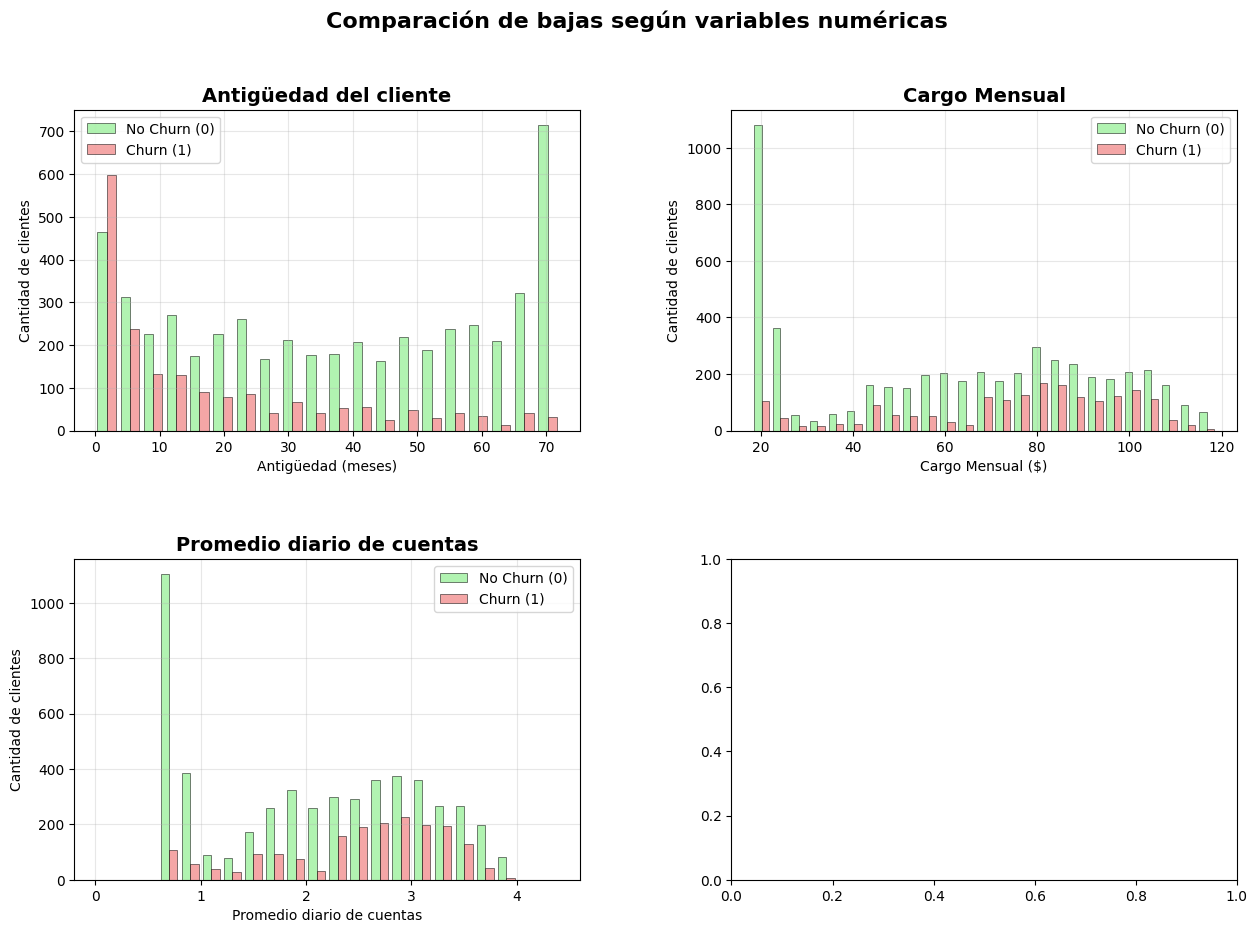

In [26]:
# crear una figura para almacenar todos los graficos y mejorar la visibilidad
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Ajustar el espacio entre los subplots para mejorar la visualización
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Comparación de bajas según variables numéricas', fontsize=16, fontweight='bold')

# definir colores
color_no_churn = 'lightgreen' 
color_churn = 'lightcoral'     

# separar los datos por grupo de churn
datos_no_churn = datos_limpios[datos_limpios['Churn'] == 0]
datos_churn = datos_limpios[datos_limpios['Churn'] == 1]

# primer subplot 
axs[0, 0].hist([datos_no_churn['customer_tenure'], datos_churn['customer_tenure']], 
               bins=20, 
               color=[color_no_churn, color_churn], 
               alpha=0.7, 
               label=['No Churn (0)', 'Churn (1)'],
               edgecolor='black',
               linewidth=0.5)
axs[0, 0].set_title('Antigüedad del cliente', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Antigüedad (meses)')
axs[0, 0].set_ylabel('Cantidad de clientes')
axs[0, 0].legend()
axs[0, 0].grid(True, alpha=0.3)

# segundo subplot (
axs[0, 1].hist([datos_no_churn['account_Charges.Monthly'], datos_churn['account_Charges.Monthly']], 
               bins=25, 
               color=[color_no_churn, color_churn], 
               alpha=0.7, 
               label=['No Churn (0)', 'Churn (1)'],
               edgecolor='black',
               linewidth=0.5)
axs[0, 1].set_title('Cargo Mensual', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Cargo Mensual ($)')
axs[0, 1].set_ylabel('Cantidad de clientes')
axs[0, 1].legend()
axs[0, 1].grid(True, alpha=0.3)

# tercer subplot 
# para Daily_Accounts, crear bins específicos 
bins_daily = np.arange(0, datos_limpios['Daily_Accounts'].max() + 0.5, 0.2)
axs[1, 0].hist([datos_no_churn['Daily_Accounts'], datos_churn['Daily_Accounts']], 
               bins=bins_daily, 
               color=[color_no_churn, color_churn], 
               alpha=0.7, 
               label=['No Churn (0)', 'Churn (1)'],
               edgecolor='black',
               linewidth=0.5)
axs[1, 0].set_title('Promedio diario de cuentas', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Promedio diario de cuentas')
axs[1, 0].set_ylabel('Cantidad de clientes')
axs[1, 0].legend()
axs[1, 0].grid(True, alpha=0.3)


## **Reporte de los Insights de variables Numéricas**:

## **1. Antigüedad del Cliente**
##### **Insight Principal**
##### Los clientes nuevos tienen mayor riesgo de abandono, con un punto crítico en los primeros 5 meses.
##### **Hallazgos Clave**
##### **0-5 meses:** Pico máximo de churn (~600 clientes con churn vs ~475 sin churn)
##### **50+ meses:** Excelente retención (~325 clientes sin churn vs ~75 con churn)
##### **Patrón:** Disminución gradual del churn conforme aumenta la antigüedad


## **2. Cargo Mensual**
##### **Insight Principal**
##### El rango $60-80 presenta la mayor fricción, mientras que cargos bajos mantienen excelente retención.
##### **Hallazgos Clave**
##### **$20-30:** Tasa de churn ~9% (1,050 activos vs 100 churn)
##### **$60-80:** Tasa de churn ~50% (zona crítica de abandono)
##### **Patrón:** Relación inversa entre precio bajo y churn


## **3. Promedio Diario de Cuentas**
##### **Insight Principal**
##### Los usuarios de baja actividad muestran mayor lealtad que los usuarios más activos.
##### **Hallazgos Clave**
##### **0.5-1.0** cuentas/día: Tasa de churn ~9% (1,150 activos vs 120 churn)
##### **1.0-2.0** cuentas/día: Tasa de churn ~21% (mayor abandono)
##### **Patrón:** Usuarios ocasionales = mayor satisfacción


## **Conclusiones Clave**
##### **Factores de Alto Riesgo**
#### **Antigüedad < 5 meses** - Crisis de onboarding
#### **Cargo mensual $60-80** - Punto de fricción precio-valor
#### **Actividad moderada** - Expectativas no cumplidas

#### **Segmentos de Alta Retención**

##### **Clientes veteranos** (50+ meses) - Lealtad consolidada
##### **Segmento económico** ($20-30) - Excelente relación precio-valor
##### **Usuarios ocasionales** - Expectativas alineadas

#####  **Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:**
#####  
#####  🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).
#####  
#####  🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.
#####  
#####  🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.
#####  
#####  🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.
#####  
#####  🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.
#####  
#####  **Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀**

# **Informe Final – Análisis de Evasión de Clientes (Churn)**

## 🔹 **Introducción**

El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (churn) dentro de una empresa de servicios de telecomunicaciones. El churn representa la pérdida de clientes y es un problema crítico que afecta los ingresos, la estabilidad y la reputación de la empresa. A través del análisis exploratorio de datos, se busca identificar patrones y variables asociadas a este fenómeno

## 🔹 **Limpieza y Tratamiento de Datos**

Se realizaron los siguientes pasos para preparar el dataset:

- **Importación de datos** desde un archivo JSON.
- **Revisión de valores nulos**, eliminando aquellos registros que presentaban datos incompletos.

## 🔹 **Análisis Exploratorio de Datos**

Se desarrollaron múltiples visualizaciones con Plotly Express para entender las relaciones entre variables y el churn:

- **Distribución general del churn**: aproximadamente el 26% de los clientes abandonaron el servicio.
- **Análisis por tipo de contrato**: los contratos mensuales tienen una tasa de evasión significativamente mayor que los contratos anuales o bianuales.
- **Método de pago**: los clientes que pagan con métodos electrónicos como tarjetas presentan más churn que aquellos con débito automático.
- **Género y dependencia**: no se observaron diferencias significativas por género, pero sí se encontró menor churn en clientes con dependientes o pareja.
- **Servicios contratados**: la ausencia de servicios adicionales (como internet o seguridad en línea) se asocia con mayor churn.

## 🔹 **Conclusiones e Insights**

- **Tipo de contrato y método de pago** son variables clave: contratos más largos y métodos de pago automáticos reducen el churn.
- **Clientes con mayor nivel de compromiso** (contratos a largo plazo, dependientes, múltiples servicios) muestran menor tasa de abandono.
- **Clientes nuevos o sin servicios adicionales** tienden a abandonar más fácilmente.
- Existe una oportunidad de actuar sobre clientes con contratos mensuales, sin dependientes y con bajo uso de servicios.

## 🔹 **Recomendaciones**

- **Incentivar contratos a largo plazo** mediante descuentos o beneficios adicionales.
- **Fomentar el uso de servicios complementarios** (por ejemplo, bundles de servicios).
- **Ofrecer bonificaciones o programas de fidelización** para clientes en riesgo (por ejemplo, con contratos mensuales y pago con tarjeta).
- **Implementar alertas tempranas** basadas en variables predictoras de churn para campañas de retención.
- **Facilitar la migración a métodos de pago automáticos**, lo cual se asocia a una menor tasa de abandono.